In [1]:
#!pip install pyspark
#!pip install findspark
#!pip install matplotlib

In [2]:
#findspark localiza a distribuição do spark
import findspark
import os
import matplotlib.pyplot as plt
from pyspark.sql.functions import *
from pyspark.sql import *

In [3]:
findspark.init()

In [4]:
from pyspark import SparkContext, SparkConf

In [5]:
os.environ['PYSPARK_SUBMIT_ARGS'] = '--packages com.datastax.spark:spark-cassandra-connector_2.12:3.4.1 pyspark-shell'
os.environ['JAVA_HOME'] = '/usr/lib/jvm/java-8-openjdk-amd64'
conf = SparkConf()
conf.set('spark.cassandra.connection.host', '127.0.3.1')
conf.set('spark.cassandra.connection.port', '9042')

In [6]:
sc = SparkContext().getOrCreate(conf=conf)
sqlContext = SQLContext(sc)

23/12/17 20:34:35 WARN Utils: Your hostname, r-Aspire-4736Z resolves to a loopback address: 127.0.1.1; using 192.168.2.120 instead (on interface wlp4s0)
23/12/17 20:34:35 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


:: loading settings :: url = jar:file:/home/r/anaconda3/lib/python3.9/site-packages/pyspark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /home/r/.ivy2/cache
The jars for the packages stored in: /home/r/.ivy2/jars
com.datastax.spark#spark-cassandra-connector_2.12 added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-8029593f-96e1-4bd5-a4fa-d052299d8dda;1.0
	confs: [default]
	found com.datastax.spark#spark-cassandra-connector_2.12;3.4.1 in central
	found com.datastax.spark#spark-cassandra-connector-driver_2.12;3.4.1 in central
	found org.scala-lang.modules#scala-collection-compat_2.12;2.11.0 in central
	found com.datastax.oss#java-driver-core-shaded;4.13.0 in central
	found com.datastax.oss#native-protocol;1.5.0 in central
	found com.datastax.oss#java-driver-shaded-guava;25.1-jre-graal-sub-1 in central
	found com.typesafe#config;1.4.1 in central
	found org.slf4j#slf4j-api;1.7.26 in central
	found io.dropwizard.metrics#metrics-core;4.1.18 in central
	found org.hdrhistogram#HdrHistogram;2.1.12 in central
	found org.reactivestreams#reactive-streams;1.0.3 in central


In [7]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [8]:
casas = sqlContext.read.format("org.apache.spark.sql.cassandra").load(table="casas", keyspace = "analises")

In [9]:
casas.show()

+---+--------------------+----+----------+---------+--------+----+-------+
| id|             address|area|       lat|      lon|   price|room|    zip|
+---+--------------------+----+----------+---------+--------+----+-------+
|802|Hamontstraat 59, ...| 134| 52.348999| 4.812092|575000.0|   6|1066 LG|
|666|Gulden Winckelpla...|  50| 52.378843| 4.847496|319000.0|   2|1055 EL|
|706|Oude-IJselstraat ...|  53| 52.347889| 4.901411|385000.0|   2|1078 CL|
|523|Wagenaarstraat 41...|  58| 52.363772| 4.928824|   4e+05|   2|1093 CN|
|449|Pieter van der Me...| 115|   52.2976| 4.995049|395000.0|   6|1106 WV|
| 84|Driehoekstraat 72...|  67| 52.382746| 4.882743|469000.0|   2|1015 GL|
| 31|Churchill-laan 37...|  98| 52.346366| 4.900342|   8e+05|   3|1078 DE|
|189|Mauritsstraat 2, ...|  45| 52.358857|   4.9064|450000.0|   2|1091 DA|
|773|Jan van Zutphenst...| 136| 52.350604| 4.802149|   6e+05|   4|1069 RR|
|476|Schalk Burgerstra...|  46| 52.353214| 4.920288|   3e+05|   3|1091 LJ|
|559|Lodewijk Boisotst...

In [10]:
casas.count()

924

In [11]:
#Casas a partir de dois milhões de euros
maior_2mi = casas.where("price > 2000000")

In [12]:
maior_2mi.show()

+---+--------------------+----+---------+--------+---------+----+-------+
| id|             address|area|      lat|     lon|    price|room|    zip|
+---+--------------------+----+---------+--------+---------+----+-------+
|306|Singel 318, Amste...| 623|52.371039|4.887869|4900000.0|  13|1016 AE|
|104|Westeinde 16, Ams...| 497|52.358798| 4.89862|4550000.0|  13|1017 ZP|
|232|Nieuwe Leliestraa...| 259|52.375756|4.883278|2450000.0|   8|1015 SH|
|335|Singel 146 A, Ams...| 348|52.375532|4.889816|3500000.0|   8|1015 AG|
|196|Keizersgracht 544...| 394|52.365078|4.887378|5950000.0|  10|1017 EL|
|180|  Dam 5 V, Amsterdam| 178|52.373106| 4.89429|4495000.0|   5|1012 JS|
|296|Tweede Jan van de...| 387|52.355179| 4.89935|2650000.0|  10|1073 VE|
|293|Vossiusstraat 71,...| 202|52.359763|4.876117|2500000.0|   6|1071 AK|
|302|Badhuiskade 353, ...| 374|52.385321|4.905695|3680000.0|   4|1031 KV|
|281|Amstel 102, Amste...| 150|52.366965|4.896842|2325000.0|   6|1017 AD|
|254|Valeriusstraat 13...| 198|52.3532

In [13]:
#Casas com preço menor que um milhão de euros
menor_1mi = casas.where("price < 1000000")

In [14]:
menor_1mi.show()

+---+--------------------+----+----------------+----------------+--------+----+-------+
| id|             address|area|             lat|             lon|   price|room|    zip|
+---+--------------------+----+----------------+----------------+--------+----+-------+
| 15|Blasiusstraat 50 ...|  86|       52.356532|        4.909361|650000.0|   3|1091 CT|
|604|Waterlandplein 29...|  87|       52.393215|        4.954462|350000.0|   3|1024 NB|
|112|Veldzicht 85, Ams...|  61|       52.362969|        4.798199|345000.0|   3|1068 SM|
|632|Zuidelijke Wandel...| 123|        52.33822|        4.894206|930000.0|   4|1079 RK|
|898|Haringbuisdijk 14...| 128|52.3686532505277|4.90981909560303|575000.0|   4|1086 VA|
|917|Eerste Looiersdwa...|  59|       52.368961|        4.880977|525000.0|   4|1016 VM|
| 65|Overtoom 502 I, A...|  72|       52.359026|        4.859628|550000.0|   3|1054 KJ|
|638|Zaagmolenstraat 9...|  46|       52.377961|        4.873501|350000.0|   3|1052 HB|
|236|Wijdesteeg 62, Am...| 111| 

In [15]:
menor_1mi.select("room").distinct().show()

+----+
|room|
+----+
|   6|
|   3|
|   5|
|   4|
|   7|
|   2|
|   1|
|   8|
+----+



In [16]:
maior_2mi.select("room").distinct().show()

+----+
|room|
+----+
|   8|
|  10|
|   6|
|   3|
|   4|
|   7|
|  13|
|  14|
|   5|
+----+



In [17]:
menor_1mi_grupo = menor_1mi.groupby('room').count()

In [18]:
#Agrupamento de quartos e contagem, mostrando em ordem decrescente a contagem
menor_1mi_grupo.sort('count', ascending = [False]).show()

+----+-----+
|room|count|
+----+-----+
|   3|  283|
|   2|  158|
|   4|  150|
|   5|   65|
|   6|   19|
|   1|   15|
|   7|    7|
|   8|    1|
+----+-----+



In [19]:
maior_2mi_grupo = maior_2mi.groupby('room').count()

In [20]:
#Agrupamento de quartos e contagem, mostrando em ordem decrescente a contagem
maior_2mi_grupo.sort('count', ascending = [False]).show()

+----+-----+
|room|count|
+----+-----+
|   8|    4|
|   7|    3|
|   6|    2|
|   4|    2|
|  10|    2|
|  13|    2|
|   3|    1|
|   5|    1|
|  14|    1|
+----+-----+



In [21]:
media_precos_por_quarto_2 = maior_2mi.groupBy('room').agg(avg('price').alias('media_preco'))

In [22]:
media_precos_por_quarto_2.sort('media_preco', ascending = [False]).show()

+----+------------------+
|room|       media_preco|
+----+------------------+
|  14|         5850000.0|
|  13|         4725000.0|
|   5|         4495000.0|
|  10|         4300000.0|
|   7|3208333.3333333335|
|   4|         3077500.0|
|   8|         2737500.0|
|   3|         2475000.0|
|   6|         2412500.0|
+----+------------------+



In [23]:
media_precos_por_quarto_1 = menor_1mi.groupBy('room').agg(avg('price').alias('media_preco'))

In [24]:
media_precos_por_quarto_1.sort('media_preco', ascending = [False]).show()

+----+-----------------+
|room|      media_preco|
+----+-----------------+
|   7|871428.5714285715|
|   8|         799000.0|
|   6|626789.4736842106|
|   5|619652.3076923077|
|   4|        500525.76|
|   3| 476669.296819788|
|   1|400466.6666666667|
|   2|366136.0759493671|
+----+-----------------+



In [25]:
agrupamento_precos_e_contagem_1 = menor_1mi.groupBy('room').agg(avg('price').alias('media_de_preco'), count('*').alias('numero_de_casas'))

In [26]:
# Renomear a coluna 'room' para 'numero_de_quartos'
agrupamento_precos_e_contagem_1 = agrupamento_precos_e_contagem_1.withColumnRenamed('room', 'numero_de_quartos')

In [27]:
# Reorganizar a ordem das colunas
agrupamento_precos_e_contagem_1 = agrupamento_precos_e_contagem_1.select('numero_de_casas', 'numero_de_quartos', 'media_de_preco')

In [28]:
agrupamento_precos_e_contagem_1.sort('media_de_preco', ascending = [False]).show()

+---------------+-----------------+-----------------+
|numero_de_casas|numero_de_quartos|   media_de_preco|
+---------------+-----------------+-----------------+
|              7|                7|871428.5714285715|
|              1|                8|         799000.0|
|             19|                6|626789.4736842106|
|             65|                5|619652.3076923077|
|            150|                4|        500525.76|
|            283|                3| 476669.296819788|
|             15|                1|400466.6666666667|
|            158|                2|366136.0759493671|
+---------------+-----------------+-----------------+



In [29]:
agrupamento_precos_e_contagem_2 = maior_2mi.groupBy('room').agg(avg('price').alias('media_de_preco'), count('*').alias('numero_de_casas'))

In [30]:
# Renomear a coluna 'room' para 'numero_de_quartos'
agrupamento_precos_e_contagem_2 = agrupamento_precos_e_contagem_2.withColumnRenamed('room', 'numero_de_quartos')

In [31]:
# Reorganizar a ordem das colunas
agrupamento_precos_e_contagem_2 = agrupamento_precos_e_contagem_2.select('numero_de_casas', 'numero_de_quartos', 'media_de_preco')

In [32]:
agrupamento_precos_e_contagem_2.sort('media_de_preco', ascending = [False]).show()

+---------------+-----------------+------------------+
|numero_de_casas|numero_de_quartos|    media_de_preco|
+---------------+-----------------+------------------+
|              1|               14|         5850000.0|
|              2|               13|         4725000.0|
|              1|                5|         4495000.0|
|              2|               10|         4300000.0|
|              3|                7|3208333.3333333335|
|              2|                4|         3077500.0|
|              4|                8|         2737500.0|
|              1|                3|         2475000.0|
|              2|                6|         2412500.0|
+---------------+-----------------+------------------+



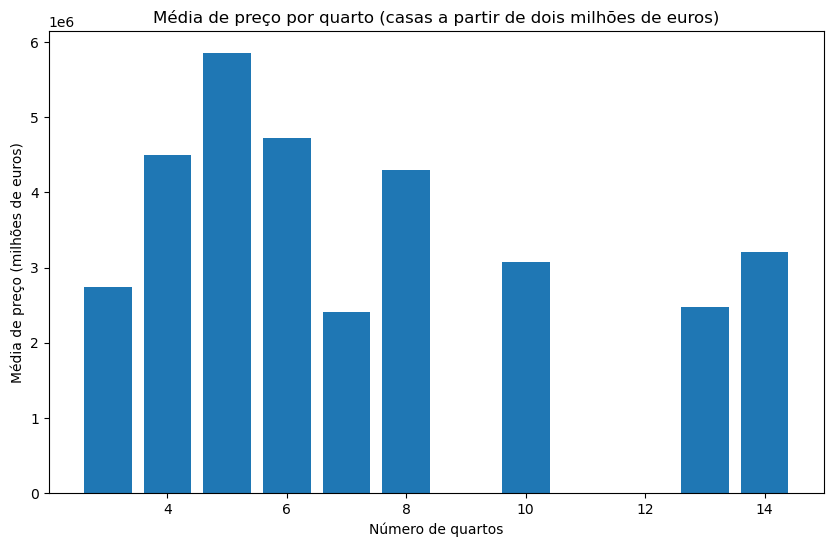

In [33]:
# Coletar os dados para o gráfico
num_quartos = agrupamento_precos_e_contagem_2.select('numero_de_quartos').rdd.flatMap(lambda x: x).collect()
media_preco = agrupamento_precos_e_contagem_2.select('media_de_preco').rdd.flatMap(lambda x: x).collect()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(num_quartos, media_preco)
plt.xlabel('Número de quartos')
plt.ylabel('Média de preço (milhões de euros)')
plt.title('Média de preço por quarto (casas a partir de dois milhões de euros)')
plt.show()

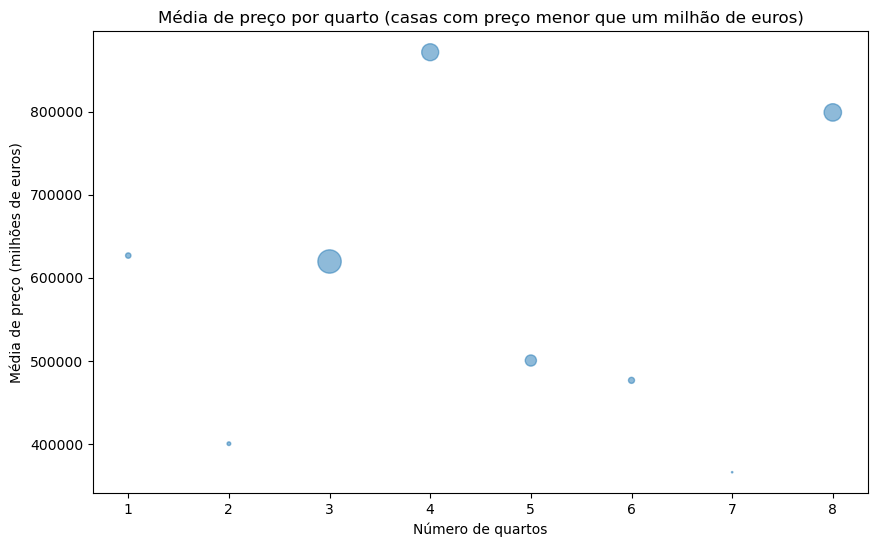

In [34]:
# Coletar os dados para o gráfico de dispersão
num_casas = agrupamento_precos_e_contagem_1.select('numero_de_casas').rdd.flatMap(lambda x: x).collect()
num_quartos = agrupamento_precos_e_contagem_1.select('numero_de_quartos').rdd.flatMap(lambda x: x).collect()
media_preco = agrupamento_precos_e_contagem_1.select('media_de_preco').rdd.flatMap(lambda x: x).collect()

# Plotar o gráfico de dispersão
plt.figure(figsize=(10, 6))
plt.scatter(num_quartos, media_preco, s=num_casas, alpha=0.5)
plt.xlabel('Número de quartos')
plt.ylabel('Média de preço (milhões de euros)')
plt.title('Média de preço por quarto (casas com preço menor que um milhão de euros)')
plt.show()

In [ ]:
#MACHINE LEARNING

In [41]:
from pyspark.sql.functions import col
data = casas.withColumn("price", col("price").cast("float"))

In [44]:
#Vetor de recursos com as colunas relevantes

from pyspark.ml.feature import VectorAssembler
feature_columns = ["area", "room", "lon", "lat"]
assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(data)

In [45]:
#Divindo dados em conjuntos de treinamento e teste

train_data, test_data = data.randomSplit([0.8, 0.2], seed=42)

In [51]:
from pyspark.sql.functions import col

data = data.withColumn("price", col("price").cast("float"))

In [53]:
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol="features", labelCol="price")
lr_model = lr.fit(train_data)

23/12/17 21:01:34 WARN Instrumentation: [5b86159c] regParam is zero, which might cause numerical instability and overfitting.
23/12/17 21:01:35 ERROR Executor: Exception in task 2.0 in stage 55.0 (TID 121)]
java.lang.RuntimeException: Labels MUST NOT be Null or NaN
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.project_doConsume_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.

Py4JJavaError: An error occurred while calling o486.fit.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 2 in stage 55.0 failed 1 times, most recent failure: Lost task 2.0 in stage 55.0 (TID 121) (192.168.2.120 executor driver): java.lang.RuntimeException: Labels MUST NOT be Null or NaN
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.project_doConsume_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.TraversableOnce.foldLeft(TraversableOnce.scala:199)
	at scala.collection.TraversableOnce.foldLeft$(TraversableOnce.scala:192)
	at scala.collection.AbstractIterator.foldLeft(Iterator.scala:1431)
	at scala.collection.TraversableOnce.aggregate(TraversableOnce.scala:260)
	at scala.collection.TraversableOnce.aggregate$(TraversableOnce.scala:260)
	at scala.collection.AbstractIterator.aggregate(Iterator.scala:1431)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$4(RDD.scala:1261)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$6(RDD.scala:1262)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:855)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:855)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	at java.lang.Thread.run(Thread.java:750)

Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.failJobAndIndependentStages(DAGScheduler.scala:2844)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2(DAGScheduler.scala:2780)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$abortStage$2$adapted(DAGScheduler.scala:2779)
	at scala.collection.mutable.ResizableArray.foreach(ResizableArray.scala:62)
	at scala.collection.mutable.ResizableArray.foreach$(ResizableArray.scala:55)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:2779)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1(DAGScheduler.scala:1242)
	at org.apache.spark.scheduler.DAGScheduler.$anonfun$handleTaskSetFailed$1$adapted(DAGScheduler.scala:1242)
	at scala.Option.foreach(Option.scala:407)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:1242)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:3048)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2982)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:2971)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:49)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:984)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2398)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:2493)
	at org.apache.spark.rdd.RDD.$anonfun$fold$1(RDD.scala:1199)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:407)
	at org.apache.spark.rdd.RDD.fold(RDD.scala:1193)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$2(RDD.scala:1286)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:407)
	at org.apache.spark.rdd.RDD.treeAggregate(RDD.scala:1253)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$1(RDD.scala:1239)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:151)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:112)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:407)
	at org.apache.spark.rdd.RDD.treeAggregate(RDD.scala:1239)
	at org.apache.spark.ml.optim.WeightedLeastSquares.fit(WeightedLeastSquares.scala:107)
	at org.apache.spark.ml.regression.LinearRegression.trainWithNormal(LinearRegression.scala:456)
	at org.apache.spark.ml.regression.LinearRegression.$anonfun$train$1(LinearRegression.scala:354)
	at org.apache.spark.ml.util.Instrumentation$.$anonfun$instrumented$1(Instrumentation.scala:191)
	at scala.util.Try$.apply(Try.scala:213)
	at org.apache.spark.ml.util.Instrumentation$.instrumented(Instrumentation.scala:191)
	at org.apache.spark.ml.regression.LinearRegression.train(LinearRegression.scala:329)
	at org.apache.spark.ml.regression.LinearRegression.train(LinearRegression.scala:186)
	at org.apache.spark.ml.Predictor.fit(Predictor.scala:114)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:374)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.lang.Thread.run(Thread.java:750)
Caused by: java.lang.RuntimeException: Labels MUST NOT be Null or NaN
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.project_doConsume_0$(Unknown Source)
	at org.apache.spark.sql.catalyst.expressions.GeneratedClass$GeneratedIteratorForCodegenStage1.processNext(Unknown Source)
	at org.apache.spark.sql.execution.BufferedRowIterator.hasNext(BufferedRowIterator.java:43)
	at org.apache.spark.sql.execution.WholeStageCodegenEvaluatorFactory$WholeStageCodegenPartitionEvaluator$$anon$1.hasNext(WholeStageCodegenEvaluatorFactory.scala:43)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator$$anon$10.hasNext(Iterator.scala:460)
	at scala.collection.Iterator.foreach(Iterator.scala:943)
	at scala.collection.Iterator.foreach$(Iterator.scala:943)
	at scala.collection.AbstractIterator.foreach(Iterator.scala:1431)
	at scala.collection.TraversableOnce.foldLeft(TraversableOnce.scala:199)
	at scala.collection.TraversableOnce.foldLeft$(TraversableOnce.scala:192)
	at scala.collection.AbstractIterator.foldLeft(Iterator.scala:1431)
	at scala.collection.TraversableOnce.aggregate(TraversableOnce.scala:260)
	at scala.collection.TraversableOnce.aggregate$(TraversableOnce.scala:260)
	at scala.collection.AbstractIterator.aggregate(Iterator.scala:1431)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$4(RDD.scala:1261)
	at org.apache.spark.rdd.RDD.$anonfun$treeAggregate$6(RDD.scala:1262)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2(RDD.scala:855)
	at org.apache.spark.rdd.RDD.$anonfun$mapPartitions$2$adapted(RDD.scala:855)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.rdd.MapPartitionsRDD.compute(MapPartitionsRDD.scala:52)
	at org.apache.spark.rdd.RDD.computeOrReadCheckpoint(RDD.scala:364)
	at org.apache.spark.rdd.RDD.iterator(RDD.scala:328)
	at org.apache.spark.shuffle.ShuffleWriteProcessor.write(ShuffleWriteProcessor.scala:59)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:104)
	at org.apache.spark.scheduler.ShuffleMapTask.runTask(ShuffleMapTask.scala:54)
	at org.apache.spark.TaskContext.runTaskWithListeners(TaskContext.scala:161)
	at org.apache.spark.scheduler.Task.run(Task.scala:141)
	at org.apache.spark.executor.Executor$TaskRunner.$anonfun$run$4(Executor.scala:620)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally(SparkErrorUtils.scala:64)
	at org.apache.spark.util.SparkErrorUtils.tryWithSafeFinally$(SparkErrorUtils.scala:61)
	at org.apache.spark.util.Utils$.tryWithSafeFinally(Utils.scala:94)
	at org.apache.spark.executor.Executor$TaskRunner.run(Executor.scala:623)
	at java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1149)
	at java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:624)
	... 1 more
